In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [20]:
big_mart_data = pd.read_csv("/content/train.csv")

In [21]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
big_mart_data.shape

(8523, 12)

In [23]:
big_mart_data.info()
# gives : dtypes: [float64(4), int64(1) -> numerical features], [object(7) -> categorical values/features]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features :
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [24]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


# Handling missing data
- numerical me mean se
- categorical me mode se
missing values or NaN replace krna

In [25]:
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [26]:
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [27]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [28]:
big_mart_data['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


replacing the missing values, that are huge.. So accuracy are gonna be lost, by this preprocessing

taking mode of entire column won't be correct. So different outlet (dukans) type me kya outlet_size hai, unke mode ko alag alag dekho, unhe unke hi mode se replace kro, na ki whole outlet_size ke mod se

we're trying to fill missing values in the "Outlet_Size" column of a DataFrame called "big_mart_data" based on the corresponding "outlet_type". Us outlet type ka mode jo hoga size me, that we will use to fill.

In [ ]:
# python me lambda funnction : https://www.youtube.com/watch?v=UfFWf-PXUqE
# I didn't used that here.

we're trying to fill missing values in the "Outlet_Size" column of a DataFrame called big_mart_data based on the mode of each "Outlet_Type".

In [29]:
outlet_size_mode   =   big_mart_data.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

outlet_size_mode

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [30]:
# Find missing values in Outlet_Size column
miss_values = big_mart_data['Outlet_Size'].isnull()

In [32]:
miss_values

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [33]:
# Step 1: Calculate the mode of Outlet_Size for each Outlet_Type
outlet_size_mode   =   big_mart_data.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

# Step 2: Define a function to fill missing values based on Outlet_Type
def fill_missing_outlet_size(row):
    if pd.isnull(row['Outlet_Size']):
       return outlet_size_mode[row['Outlet_Type']]
    else:
       return row['Outlet_Size']

# Step 3: Apply the function to fill missing values in the 'Outlet_Size' column
big_mart_data['Outlet_Size'] = big_mart_data.apply(fill_missing_outlet_size, axis=1)


In [34]:
# Find missing values in Outlet_Size column
miss_values = big_mart_data['Outlet_Size'].isnull()
miss_values

,Outlet_Size
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [35]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [ ]:
sns.set() # grid etc se better look of graph ke liye

<ipython-input-20-6d36f63ad6e2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


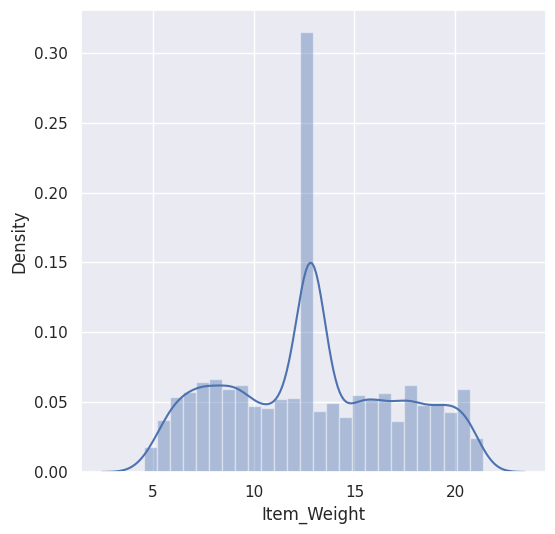

In [ ]:
# Item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

<ipython-input-21-8e520d9b77e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


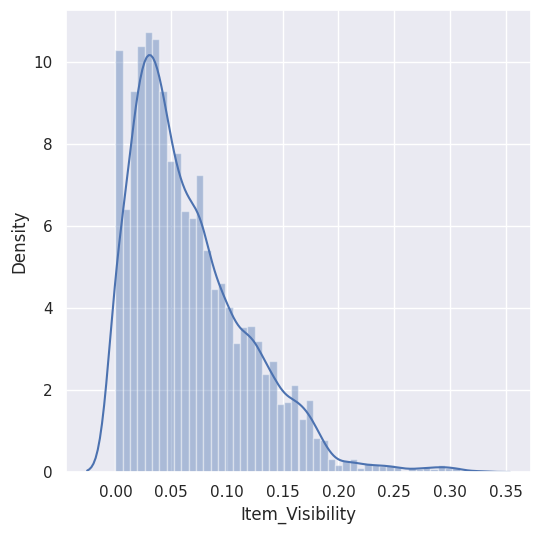

In [ ]:
# Item visibility
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()
# skewed normal dist

<ipython-input-22-b894cb59c72c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


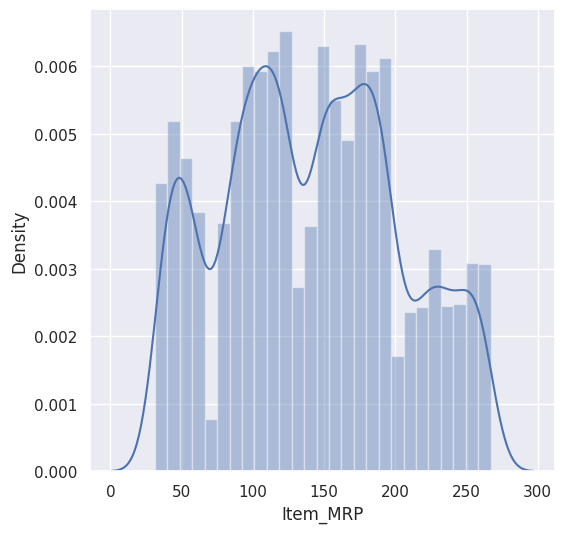

In [ ]:
# Item MRP
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-25-519581bc0161>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


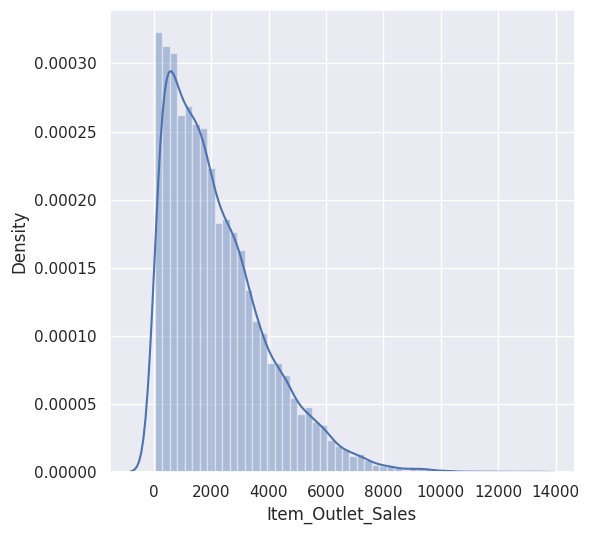

In [ ]:
# Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

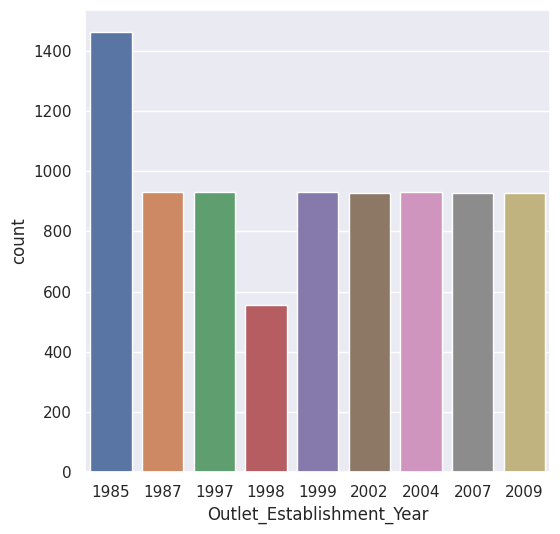

In [ ]:
# Outlet_Establishment_Year : not distribution. Count plot will be better
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",data=big_mart_data)
plt.show()

In [ ]:
#  Outlet_Establishment_Year seems intersting : kai years me equal feel ho trhe, just confirm
big_mart_data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Categorical Features
- Item_Fat_Content
- Item_Type
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


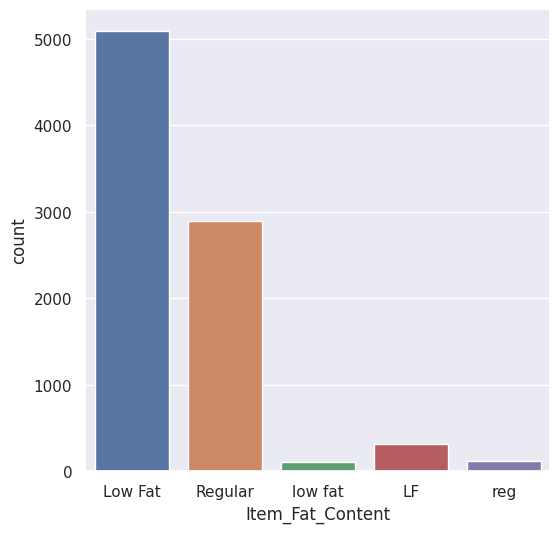

In [ ]:
# Item Fat Content
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=big_mart_data)
plt.show()
# sale Low Fat, low fat : different different name rkh diye hain

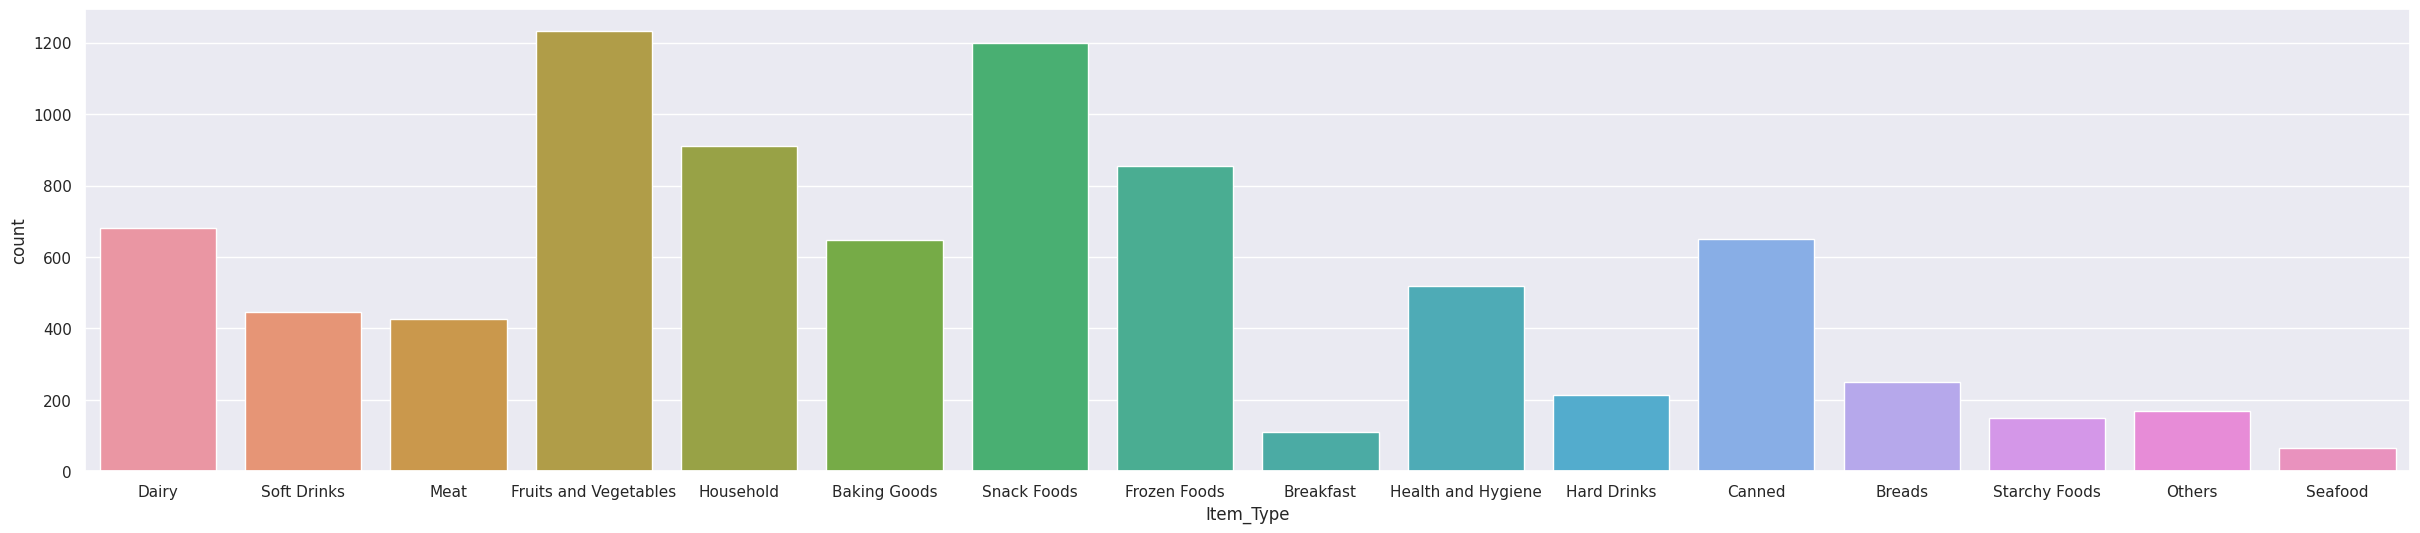

In [ ]:
# Item Type Content
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type",data=big_mart_data)
plt.show()

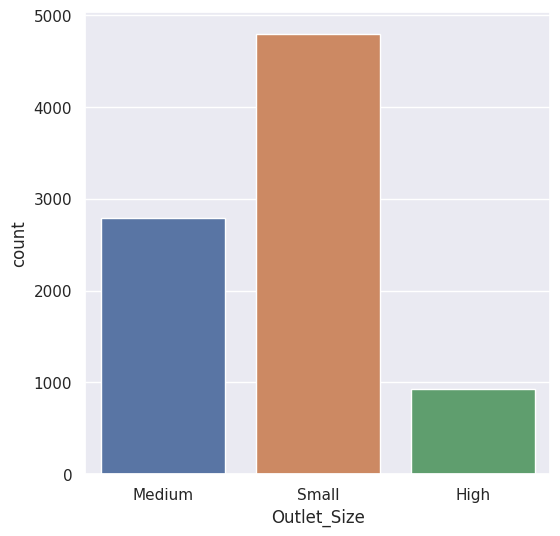

In [ ]:
# Outlet_Size Content
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size",data=big_mart_data)
plt.show()

Data Preprocessing

In [ ]:
# categorical string to categorical numerical me badalna. It is still categorical only
# For providing additional simplicity to pythod code

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()
# categories hain 2 actual me, reg is regulr and LF, low fat is Low Fat. Difference in geographical locations had led to this

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# To change the name of somting in a column
big_mart_data.replace(
    {'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},
     inplace = True)

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# label encoding

this time I will use sklearn label encoder : khud se unique values ko alphabatically 0,1,2,... de dega. Pandas way that was manual and will require a lot patience here

In [ ]:
encoder=LabelEncoder()

In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,1297,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_data['Item_Identifier'].value_counts()

1077    10
413     10
1542     9
301      9
35       9
        ..
1200     1
819      1
713      1
46       1
251      1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


In [ ]:
big_mart_data['Item_Fat_Content']=encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type']=encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier']=encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size']=encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type']=encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type']=encoder.fit_transform(big_mart_data['Outlet_Type'])

In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [ ]:
big_mart_data # head and tail sath me 5-5 dikha dega

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [ ]:
# so sklearn vala use krna encoder aage se. Like kuch columns me 1000s categories ho skti hain.
# in those kind of columns manually likhna is impossible. So it is faster and automatic, less manua work
# and don't worry , sklearn vala encoder bhi 0 se hi values ddalna start krta hai. kuch bhi randomly nhi dalta.
# numerical form mee model fit and prediction possible ho pata hai, categorical is difficult for the computer

In [ ]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [ ]:
# altough test data is separately given, but then usme alag se label encoding and preprocessing etc krna padega, So isi data ka partition kr lete hain
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=4)
# more data me 70 30 is better.
# In most cases, a 70% training and 30% testing split is better than a 50% training and 50% testing split.

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(8523, 11) (5966, 11) (2557, 11)


XGBoost regressor model training

In [ ]:
regressor=XGBRegressor()

In [ ]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# so model is trained now.
# we can use this model named "regressor" to predict y given x

Evaluation

In [ ]:
# Prediction on the training data

In [ ]:
training_data_prediction = regressor.predict(x_train)

In [ ]:
# R suare values :
r2_train = metrics.r2_score(y_train, training_data_prediction)
r2_train # generally r2 close to 1 is better model, but not always. It is relative. More or less hona we cannot say model performance is better or worse

0.887594918407287

In [ ]:
# Predivtion for testing data

In [ ]:
test_data_prediction = regressor.predict(x_test)

In [ ]:
r2_test = metrics.r2_score(y_test, test_data_prediction)
r2_test

0.4903511451167848

## Let's do once with 80 20

In [ ]:
# altough test data is separately given, but then usme alag se label encoding and preprocessing etc krna padega, So isi data ka partition kr lete hain
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=4)
# more data me 70 30 is better.
# In most cases, a 70% training and 30% testing split is better than a 50% training and 50% testing split.

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


XGBoost regressor model training

In [ ]:
regressor=XGBRegressor()

In [ ]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# so model is trained now.
# we can use this model named "regressor" to predict y given x

Evaluation

In [ ]:
# Prediction on the training data

In [ ]:
training_data_prediction = regressor.predict(x_train)

In [ ]:
# R suare values :
r2_train = metrics.r2_score(y_train, training_data_prediction)
r2_train # generally r2 close to 1 is better model, but not always. It is relative. More or less hona we cannot say model performance is better or worse

0.875366419094354

In [ ]:
# Predivtion for testing data

In [ ]:
test_data_prediction = regressor.predict(x_test)

In [ ]:
r2_test = metrics.r2_score(y_test, test_data_prediction)
r2_test

0.4835368156906652

# Scatter plot between actual and model predictions

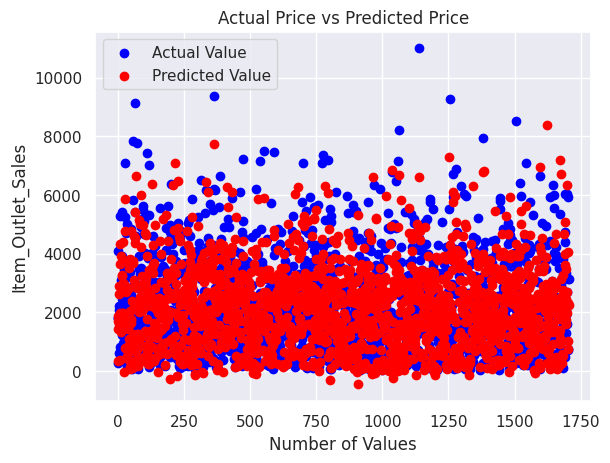

In [ ]:

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Value')
plt.scatter(range(len(test_data_prediction)), test_data_prediction, color='red', label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel("Item_Outlet_Sales")
plt.legend()  # Legend will work based on the labels provided in plt.scatter
plt.show()
# looks tike almost correct model, even on test data


If you want to create a scatter plot for only the first 50 data points from both y_test and test_data_prediction

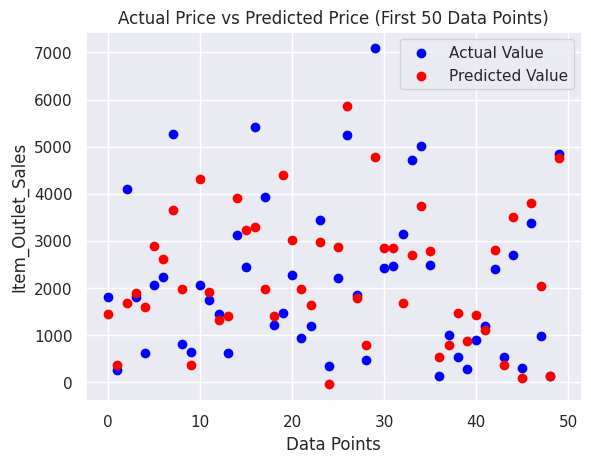

In [ ]:
# Just for better visualization
num_data_points = 50
plt.scatter(range(num_data_points), y_test[:num_data_points], color='blue', label='Actual Value')
plt.scatter(range(num_data_points), test_data_prediction[:num_data_points], color='red', label='Predicted Value')
plt.title("Actual Price vs Predicted Price (First 50 Data Points)")
plt.xlabel('Data Points')
plt.ylabel("Item_Outlet_Sales")
plt.legend()
plt.show()


If you want to mark each corresponding data point from the first 50 actual and predicted values, you can annotate the points accordingly.:
generated by chatgpt. but seems correct though

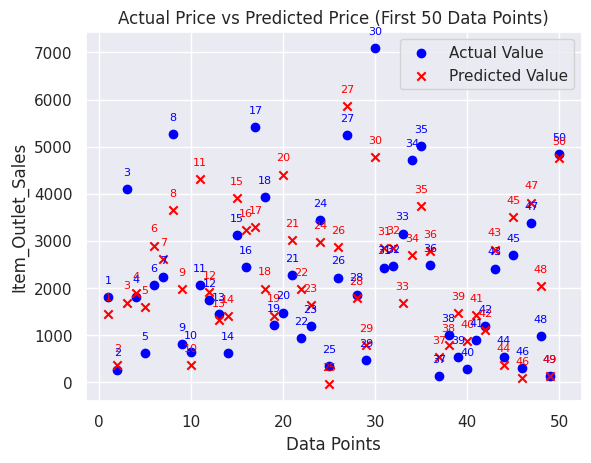

In [ ]:
import matplotlib.pyplot as plt

# Convert y_test and test_data_prediction to Python lists
y_test_list = list(y_test[:num_data_points])
test_data_prediction_list = list(test_data_prediction[:num_data_points])

# Plot the scatter plot
plt.scatter(range(1, num_data_points + 1), y_test_list, color='blue', label='Actual Value', marker='o')
plt.scatter(range(1, num_data_points + 1), test_data_prediction_list, color='red', label='Predicted Value', marker='x')

# Annotate the points with corresponding indices (1 to 50)
for i in range(num_data_points):
    plt.annotate(f"{i+1}", (i+1, y_test_list[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')
    plt.annotate(f"{i+1}", (i+1, test_data_prediction_list[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

plt.title("Actual Price vs Predicted Price (First 50 Data Points)")
plt.xlabel('Data Points')
plt.ylabel("Item_Outlet_Sales")
plt.legend()
plt.show()




Line plot se dekhne ka prayas krte hai

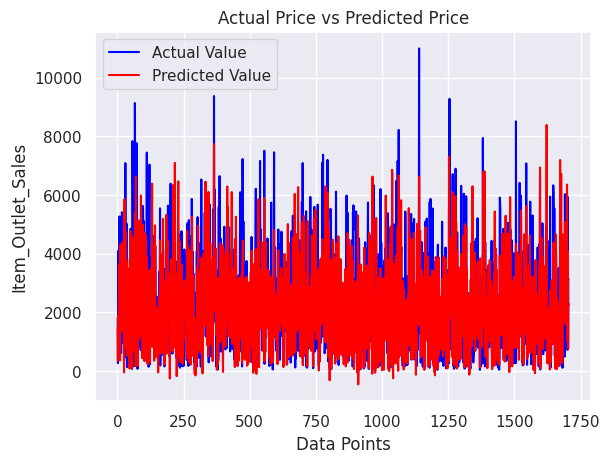

In [ ]:
# Assuming y_test and test_data_prediction are your actual and predicted values respectively
# Create x-axis values from 1 to the length of y_test
x_values = range(1, len(y_test) + 1)

# Plot actual values in blue and predicted values in red
plt.plot(x_values, y_test, color='blue', label='Actual Value')
plt.plot(x_values, test_data_prediction, color='red', label='Predicted Value')

plt.title("Actual Price vs Predicted Price")
plt.xlabel('Data Points Serial Number')
plt.ylabel("Item_Outlet_Sales")
plt.legend()
plt.show()


To plot only the first 50 points from both y_test and test_data_prediction, you can modify the code as follows:

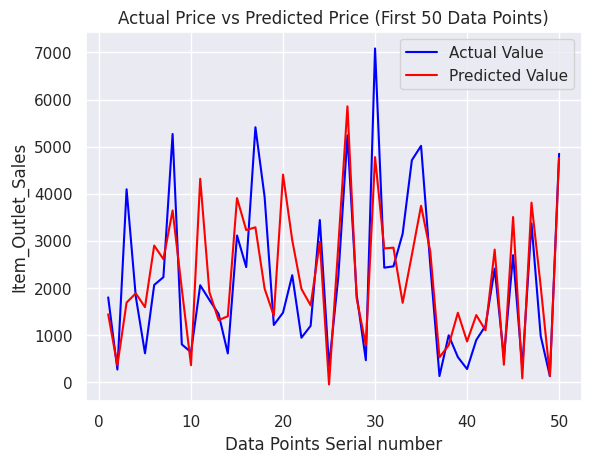

In [ ]:
import matplotlib.pyplot as plt

# Select the first 50 data points
num_data_points = 50
y_test_subset = y_test[:num_data_points]
test_data_prediction_subset = test_data_prediction[:num_data_points]

# Plot the first 50 data points
plt.plot(range(1, num_data_points + 1), y_test_subset, color='blue', label='Actual Value')
plt.plot(range(1, num_data_points + 1), test_data_prediction_subset, color='red', label='Predicted Value')

plt.title("Actual Price vs Predicted Price (First 50 Data Points)")
plt.xlabel('Data Points Serial number')
plt.ylabel("Item_Outlet_Sales")
plt.legend()
plt.show()


In [ ]:
# clearly prediction for 50 points is almost same or similar sometimes.
# 50 points lene se prediction and actual are clearly visible and distinguishable

# Finally making a simple predictive system

In [ ]:
x_test.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4476,636,20.5,0,0.020588,6,89.583,1,1987,0,2,1


In [ ]:
x_train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,782.215899,12.819064,0.353916,0.066046,7.193312,141.071697,4.748753,1997.850103,1.454385,1.107216,1.198152
std,448.499208,4.213948,0.478219,0.051703,4.193697,62.560045,2.828495,8.368956,0.681738,0.813072,0.793410
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,402.000000,9.300000,0.000000,0.026950,4.000000,93.610050,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,784.000000,12.857645,0.000000,0.053577,6.000000,142.812800,5.000000,1999.000000,2.000000,1.000000,1.000000
75%,1170.750000,16.000000,1.000000,0.094276,10.000000,185.918050,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [ ]:
query=(444,4.44,1,0.44,4.44,144,4,2004,1,1,1)
query=np.asarray(query)
query=query.reshape(1,-1)
# query
print("Predicted Price during Sales for query item is Rs.", regressor.predict(query))

Predicted Price during Sales for query item is Rs. [2974.2988]
